In [1]:
import polars as pl
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('quote_volume') / pl.col('volume')).alias('vwap'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol'))).alias('return')
])

df = df.with_columns([
    ((pl.col('vwap') - pl.col('close')) / (pl.col('vwap') + pl.col('close'))).alias('alpha042')
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,vwap,return,alpha042
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64
2023-11-22 00:00:00,0.00478,0.004825,0.004076,0.004531,1.2701e10,2023-11-22 23:59:59.999,5.6368e7,320715,6.1849e9,2.7467e7,"""1000BONKUSDT""",0.004438,null,-0.010362
2023-11-23 00:00:00,0.004531,0.004858,0.00393,0.004267,1.8971e10,2023-11-23 23:59:59.999,8.1590e7,573386,8.8982e9,3.8318e7,"""1000BONKUSDT""",0.004301,0.941735,0.003931
2023-11-24 00:00:00,0.004267,0.004335,0.003835,0.00414,1.7169e10,2023-11-24 23:59:59.999,6.9929e7,475254,7.9410e9,3.2393e7,"""1000BONKUSDT""",0.004073,0.970237,-0.008143
2023-11-25 00:00:00,0.004143,0.0046,0.004084,0.00434,1.3093e10,2023-11-25 23:59:59.999,5.6988e7,501832,6.3891e9,2.7819e7,"""1000BONKUSDT""",0.004352,1.048309,0.001433
2023-11-26 00:00:00,0.004341,0.004473,0.0039,0.004039,8.2273e9,2023-11-26 23:59:59.999,3.4347e7,344203,3.8247e9,1.5980e7,"""1000BONKUSDT""",0.004175,0.930645,0.01652
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-03-08 00:00:00,0.5161,0.5819,0.4875,0.5575,1.8804e8,2024-03-08 23:59:59.999,1.0033e8,686024,8.9756e7,4.7898e7,"""ZRXUSDT""",0.533531,1.080426,-0.021969
2024-03-09 00:00:00,0.5576,0.6067,0.5397,0.5785,9.4661e7,2024-03-09 23:59:59.999,5.3586e7,380425,4.6599725e7,2.6364e7,"""ZRXUSDT""",0.566082,1.037668,-0.01085
2024-03-10 00:00:00,0.5785,0.8259,0.5671,0.8005,7.80136805e8,2024-03-10 23:59:59.999,5.9270e8,2616066,3.9341e8,2.9910e8,"""ZRXUSDT""",0.759743,1.383751,-0.026122


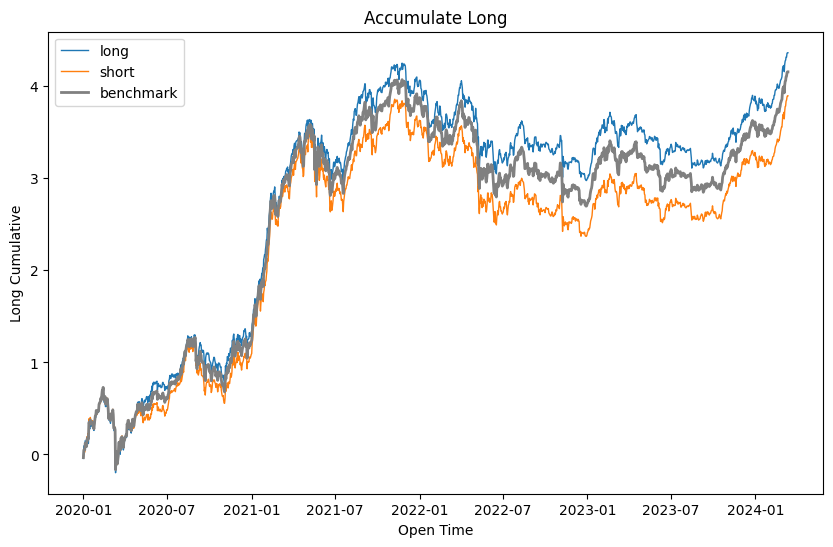

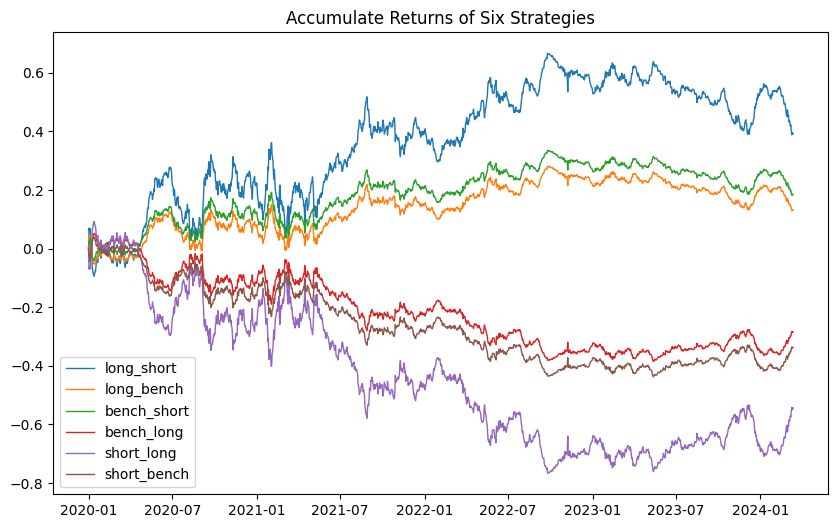

long: 
ann_return = 24.9295  sharpe = 5.2996  maxdd = 0.5354  calmar_ratio = 46.5635  

short: 
ann_return = 22.2566  sharpe = 4.9297  maxdd = 0.5062  calmar_ratio = 43.9693  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = 2.2349  sharpe = 1.6536  maxdd = 0.2275  calmar_ratio = 9.8253  

long_bench: 
ann_return = 0.7467  sharpe = 1.0935  maxdd = 0.1349  calmar_ratio = 5.536  

bench_long: 
ann_return = -1.6227  sharpe = -2.3763  maxdd = 0.4154  calmar_ratio = -3.9064  

short_long: 
ann_return = -3.1109  sharpe = -2.3017  maxdd = 0.7864  calmar_ratio = -3.956  

short_bench: 
ann_return = -1.9262  sharpe = -2.8582  maxdd = 0.4594  calmar_ratio = -4.1933  

bench_short: 
ann_return = 1.0502  sharpe = 1.5583  maxdd = 0.131  calmar_ratio = 8.0184  



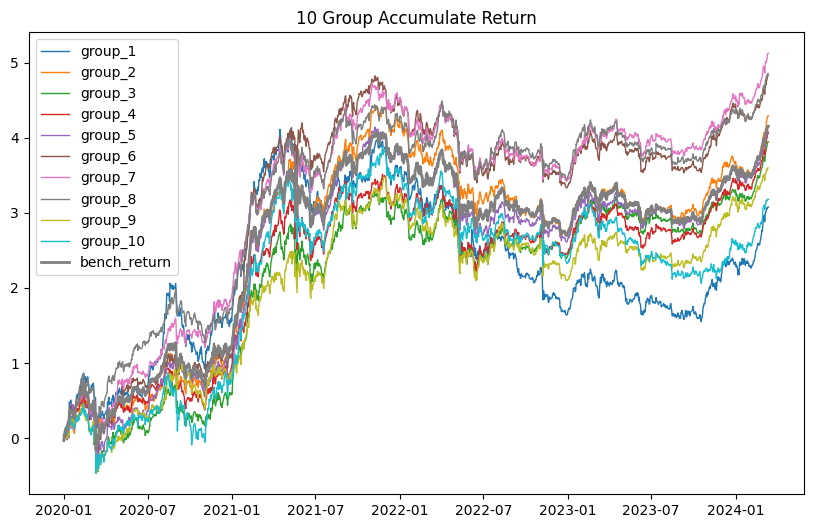

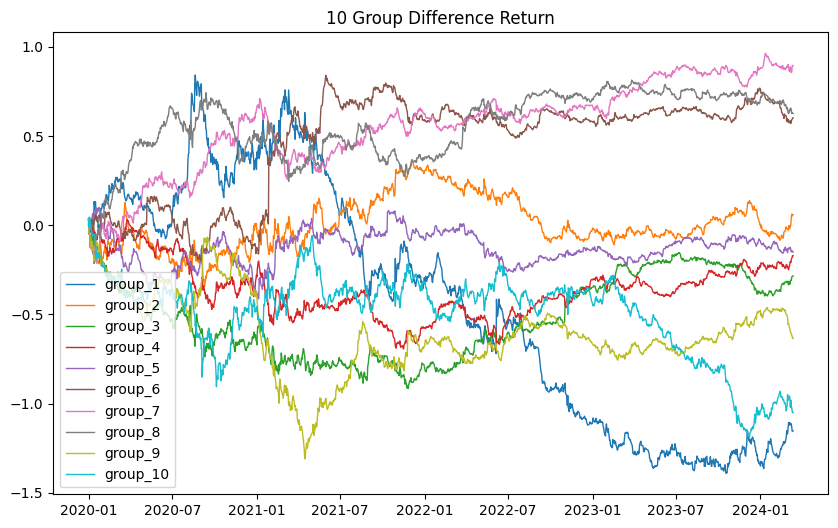

group_1: 
ann_return = 17.5919  sharpe = 3.3911  maxdd = 0.5016  calmar_ratio = 35.0716  

group_2: 
ann_return = 24.5192  sharpe = 5.2093  maxdd = 0.5828  calmar_ratio = 42.0703  

group_3: 
ann_return = 22.5562  sharpe = 4.8829  maxdd = 0.6376  calmar_ratio = 35.3774  

group_4: 
ann_return = 23.2066  sharpe = 5.0289  maxdd = 0.5158  calmar_ratio = 44.9931  

group_5: 
ann_return = 23.3254  sharpe = 5.034  maxdd = 0.5772  calmar_ratio = 40.4097  

group_6: 
ann_return = 27.6201  sharpe = 5.6392  maxdd = 0.5614  calmar_ratio = 49.1971  

group_7: 
ann_return = 29.2947  sharpe = 6.2273  maxdd = 0.5556  calmar_ratio = 52.7237  

group_8: 
ann_return = 27.7605  sharpe = 5.8634  maxdd = 0.4231  calmar_ratio = 65.6078  

group_9: 
ann_return = 20.5576  sharpe = 4.2586  maxdd = 0.626  calmar_ratio = 32.8401  

group_10: 
ann_return = 18.1768  sharpe = 3.4511  maxdd = 0.629  calmar_ratio = 28.8978  

-----------------------------------------
group_difference_1: 
ann_return = -6.5909  sharpe 

In [2]:
factors = df.select(['open_time', 'symbol', 'alpha042'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()